In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

In [36]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [37]:
mall_data = pd.read_csv(filepath_or_buffer='../samples/mall_customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [39]:
mall_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
mall_data_copy = mall_data.copy()
mall_data_copy.drop('Gender',axis=1, inplace=True)
mall_data_copy.drop('CustomerID',axis=1, inplace=True)
mall_data_copy.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


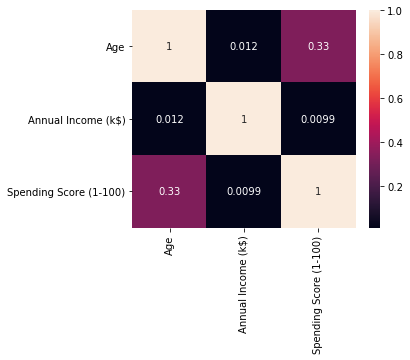

In [41]:
import seaborn as sns
sns.heatmap(abs(mall_data_copy.corr()), annot=True)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

mall_data_copy[:] = scaler.fit_transform(mall_data_copy)

mall_data_copy.head()

/Users/massimo/anaconda2/envs/Python3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
Silhouette_score = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(mall_data_copy)
    
    Sum_of_squared_distances.append( km.inertia_ )
    if k == 1:
        Silhouette_score.append( np.nan )
    else:
        Silhouette_score.append( silhouette_score( mall_data_copy, km.labels_ ) )

Text(0, 0.5, 'Silhouette_score')

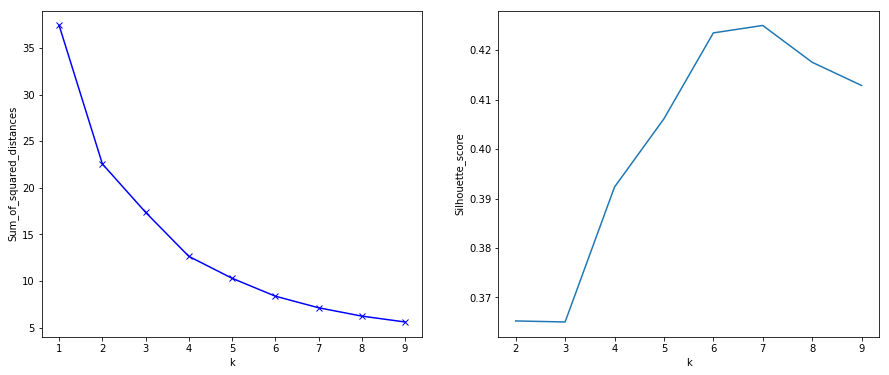

In [50]:
fig = plt.figure(figsize=[15,6])

ax1 = fig.add_subplot(1,2,1)
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax1.set_xlabel('k')
ax1.set_ylabel('Sum_of_squared_distances')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(K, Silhouette_score)
ax2.set_xlabel('k')
ax2.set_ylabel('Silhouette_score')

In [51]:
km4 = KMeans(n_clusters=5, init='k-means++')
km4.fit(mall_data_copy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

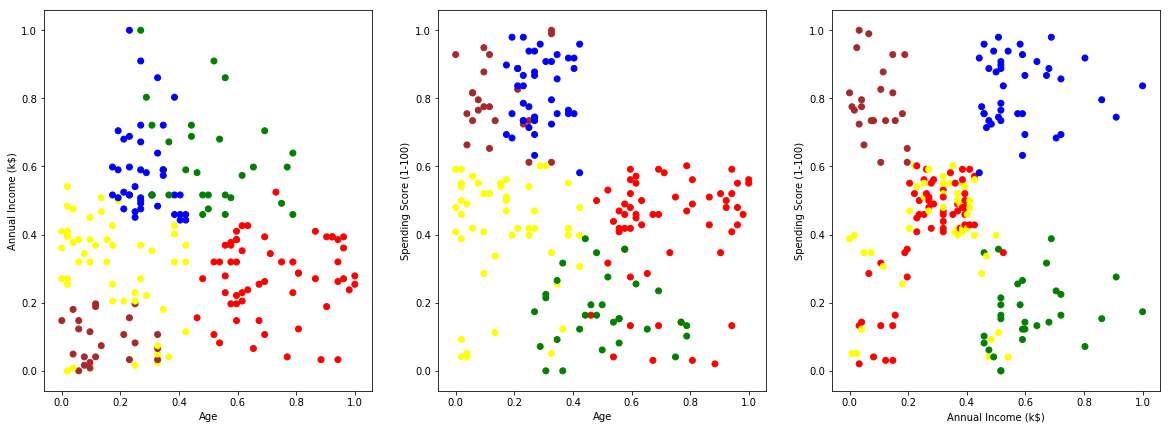

In [52]:
def scatter3(model, x, y, z):
    color_theme = np.array(['red', 'blue', 'green', 'yellow', 'brown', 'purple', 'black'])

    fig = plt.figure(figsize=[20, 7])

    ax1 = fig.add_subplot(1,3,1)
    ax1.scatter(x, y, c=color_theme[model.labels_])
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Annual Income (k$)')

    ax2 = fig.add_subplot(1,3,2)
    ax2.scatter(x, z, c=color_theme[model.labels_])
    ax2.set_xlabel('Age')
    ax2.set_ylabel('Spending Score (1-100)')

    ax3 = fig.add_subplot(1,3,3)
    ax3.scatter(y,z,c=color_theme[model.labels_])
    ax3.set_xlabel('Annual Income (k$)')
    ax3.set_ylabel('Spending Score (1-100)')

    plt.show()

scatter3(km4, mall_data_copy['Age'], mall_data_copy['Annual Income (k$)'], mall_data_copy['Spending Score (1-100)'] )


In [57]:
# dbscan

from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.21, min_samples = 25).fit(mall_data_copy)
print (db)

DBSCAN(algorithm='auto', eps=0.21, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=25, n_jobs=None, p=None)


In [58]:
from collections import Counter

print ( Counter(db.labels_) ) 

Counter({-1: 75, 0: 61, 2: 36, 1: 28})


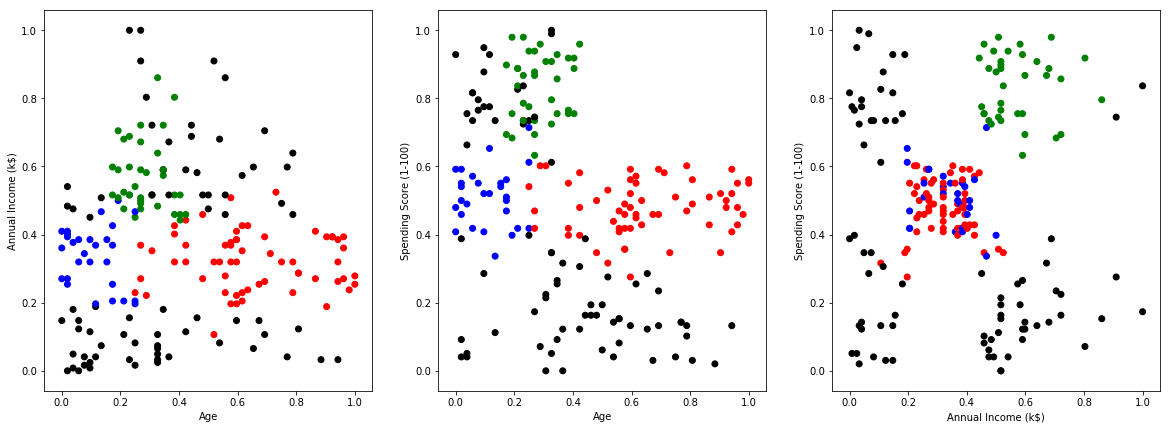

In [18]:
scatter3(db, mall_data_copy['Age'], mall_data_copy['Annual Income (k$)'], mall_data_copy['Spending Score (1-100)'] )


In [22]:
# Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(mall_data_copy)

print(agg)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=6,
            pooling_func='deprecated')


In [23]:
print ( Counter(agg.labels_) ) 

Counter({0: 56, 1: 47, 2: 39, 3: 28, 4: 21, 5: 9})


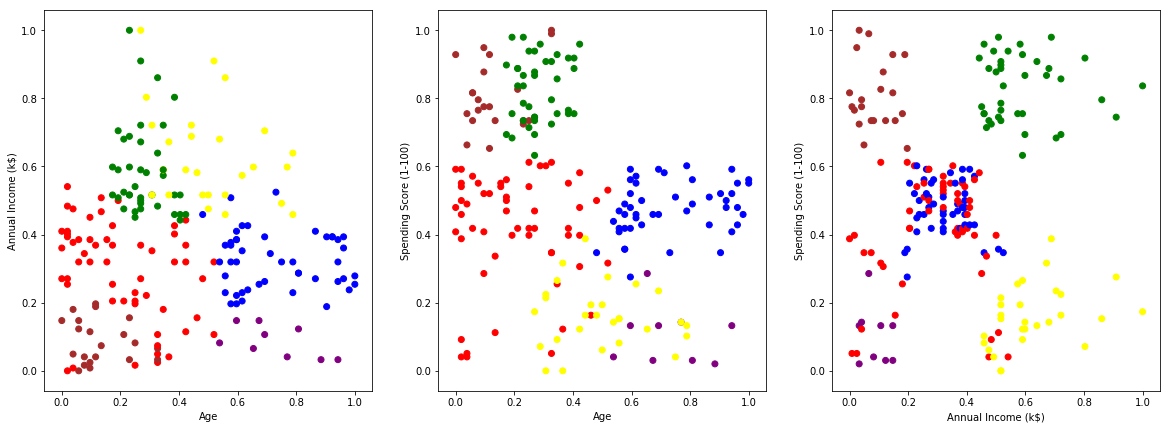

In [24]:
scatter3(agg, mall_data_copy['Age'], mall_data_copy['Annual Income (k$)'], mall_data_copy['Spending Score (1-100)'] )


In [25]:
# Per sex

mall_data_male = mall_data[mall_data.Gender=='Male'].copy()
mall_data_male.drop('Gender',axis=1, inplace=True)

mall_data_female = mall_data[mall_data.Gender=='Female'].copy()
mall_data_female.drop('Gender',axis=1, inplace=True)

In [26]:
mall_data_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 2 to 196
Data columns (total 4 columns):
CustomerID                112 non-null int64
Age                       112 non-null int64
Annual Income (k$)        112 non-null int64
Spending Score (1-100)    112 non-null int64
dtypes: int64(4)
memory usage: 4.4 KB


In [27]:
km4male = KMeans(n_clusters=6)
km4male.fit(mall_data_male)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

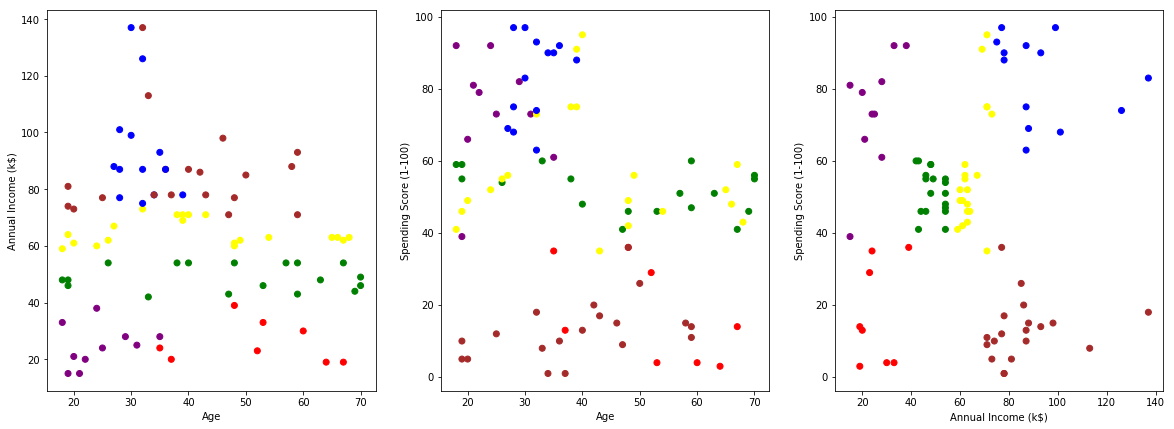

In [28]:
scatter3(km4male, mall_data_male['Age'], mall_data_male['Annual Income (k$)'], mall_data_male['Spending Score (1-100)'] )


In [30]:
km4female = KMeans(n_clusters=6)
km4female.fit(mall_data_female)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

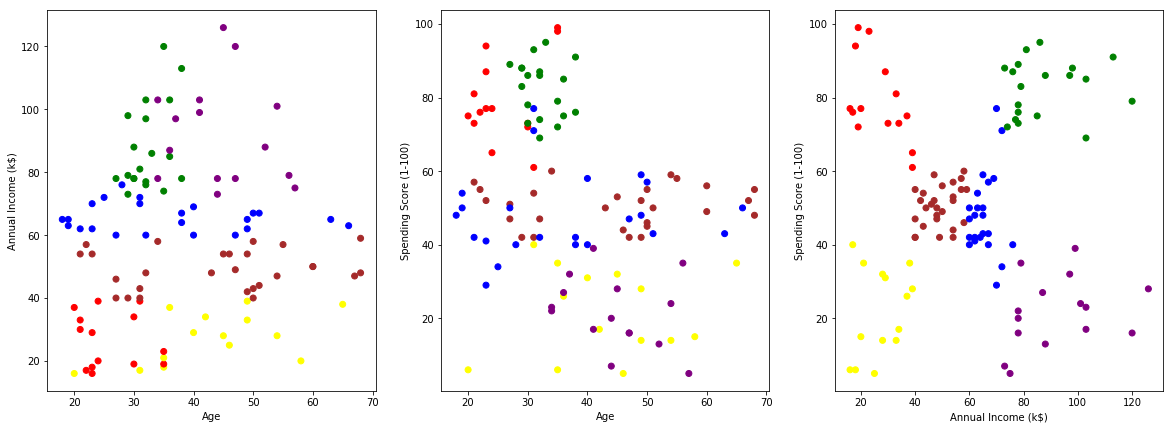

In [31]:
scatter3(km4female, mall_data_female['Age'], mall_data_female['Annual Income (k$)'], mall_data_female['Spending Score (1-100)'] )


In [133]:
from itertools import product

eps_values = np.arange(0.05,0.3,0.02) # eps values to be investigated
min_samples = np.arange(1,30) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [143]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(mall_data_copy)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    if len(np.unique(DBS_clustering.labels_))==1:
        sil_score.append(np.nan)
    else:
        sil_score.append(silhouette_score(mall_data_copy, DBS_clustering.labels_))

In [151]:
import seaborn as sb
from pandas import DataFrame

nc = np.asarray(no_of_clusters)
nc = np.reshape(nc, (len(eps_values),len(min_samples)))
ncd = DataFrame(nc, index=eps_values, columns=min_samples)

sil = np.asarray(sil_score)
sil = np.reshape(sil, (len(eps_values),len(min_samples)))

sild = DataFrame(sil, index=eps_values, columns=min_samples)


pd.options.display.max_columns = None

In [153]:
#plt.subplots(figsize=(20,15))
#sb.heatmap(ncd, annot=True)
ncd

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0.05,158,25,12,4,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.07,111,30,15,10,7,5,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.09,73,21,12,9,9,7,4,4,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.11,48,20,11,7,6,6,6,4,4,5,3,3,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.13,27,15,10,8,7,6,6,5,5,6,5,4,4,4,3,3,3,2,1,1,1,1,1,1,1,1,1,1,1
0.15,12,7,4,5,4,4,4,5,5,5,5,5,6,6,6,5,4,3,3,3,2,1,1,1,1,1,1,1,1
0.17,9,6,4,4,3,3,3,4,4,4,4,4,4,4,5,5,4,5,4,4,4,3,3,2,1,1,1,1,1
0.19,5,3,2,2,2,2,2,2,2,2,3,3,3,2,2,2,2,2,2,3,4,4,4,4,4,4,4,4,2
0.21,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,4,4,4,4,4
0.23,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3


In [154]:
#plt.subplots(figsize=(20,15))
#sb.heatmap(sild, annot=True)
sild

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0.05,0.142817,-0.244721,-0.324023,-0.328940,-0.053088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.07,0.172473,-0.006586,-0.106902,-0.194499,-0.278322,-0.322669,-0.310754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.09,0.122231,0.087709,0.052871,0.037726,0.002012,-0.029668,-0.199011,-0.261084,-0.236801,-0.145302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.11,0.028353,0.160631,0.186855,0.162481,0.138198,0.147424,0.108248,-0.013898,-0.045807,-0.090275,-0.136256,-0.170552,-0.138690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.13,-0.023487,0.130256,0.151278,0.141231,0.210555,0.222220,0.213487,0.267876,0.242157,0.177032,0.082357,-0.009377,-0.054649,-0.110187,-0.118424,-0.131091,-0.150158,-0.101302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.15,-0.118133,0.046180,0.165385,0.089558,0.073027,0.131008,0.107399,0.158162,0.307201,0.302618,0.300143,0.259001,0.227325,0.210212,0.169802,0.088918,-0.023837,-0.095645,-0.106731,-0.118095,-0.070592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.17,0.056261,0.103248,0.174341,0.164873,0.196223,0.193970,0.166477,0.164587,0.120675,0.120675,0.110684,0.109257,0.235426,0.230812,0.289403,0.278475,0.205514,0.143178,0.096129,0.088837,0.075371,0.015602,-0.043698,-0.062877,NaN,NaN,NaN,NaN,NaN
0.19,-0.050441,0.080405,0.221884,0.217825,0.218314,0.220932,0.222952,0.229377,0.220539,0.220539,0.168014,0.144499,0.142418,0.237725,0.237725,0.235896,0.177316,0.172633,0.153038,0.155140,0.214858,0.144849,0.141101,0.137467,0.107805,0.078263,0.072501,0.046269,0.148159
0.21,0.020785,0.239670,0.239670,0.233006,0.230684,0.230684,0.223302,0.232031,0.248779,0.244008,0.237232,0.236467,0.226143,0.219603,0.224030,0.208251,0.211638,0.228430,0.182884,0.182678,0.182678,0.160692,0.207547,0.206202,0.203956,0.181774,0.204803,0.156851,0.136642
0.23,0.090839,0.191508,0.191508,0.191508,0.191508,0.232653,0.232653,0.251271,0.268162,0.252072,0.248184,0.247122,0.244222,0.243390,0.240405,0.238361,0.239581,0.239581,0.239581,0.211275,0.225547,0.205833,0.203247,0.213763,0.210960,0.204153,0.203804,0.274640,0.195116
